<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aguirre Orozco Miguel y Alvarado Garnica Luis

**Fecha:** 

**Expediente** : 
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Proyecto Módulo 2


# <span style="color:red"> MORTALIDAD POR INSUFICIENCIA CARDIACA

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial , cobrando aproximadamente 17,9 millones de vidas cada año , lo que representa el 31% de todas las muertes en todo el mundo .

La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol utilizando estrategias para toda la población.

Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces en los que un modelo de aprendizaje automático puede ser de gran ayuda.

## OBJETIVOS

#### GENERAL

Predecir la muerte de una persona con insuficiencia cardiaca.

#### ESPECÍFICOS

* Encontrar la manera de complementar los nodos para realizar una predicción sobre muerte de cualquier persona. 
* Dar un apoyo extra a lo que los médicos puedan determinar con base a pruebas médicas.
* Detectar posibles muertes futuras y generar un cambio en la persona para que su salud pueda mejorar.
* Fungir como dato para la decisión del médico y paciente sobre operaciones, intervenciones o cualquier otro tratamiento que se deseé realizar.
* Probabilidad de muerte dependiendo de las pruebas de la historia clínica.


## PROBLEMA

Se busca simular la muerte por insuficiencia cardiaca según los datos de distintos pacientes, tomando en cuenta sus pruebas médicas, historia clínica, hábitos y el flujo sanguíneo que presentan.

Todo esto se va a juntar en el periodo de observación que lleve el paciente, y según los datos se determina la probabilidad de muerte. 

<img src="imagen.png">
<img src="imagen2.png">

## NODOS Y VARIABLES

História clínica:
  * Una enfermadad como antecedente puede aumentar la probabilidad de muerte. Se tomará en cuenta si tiene una de las 3, 2 enfermedades, las 3 o ninguna.
  
Pruebas médicas:
  * Importante conocer el estado actual del paciente y como está su sangre.
   
Flujo sanguíneo:
  * Cantidad de sangre que sale del corazón por cada contracción.
  
A todos estos nodos hay que agregarle el tiempo que se lleva en observación, es un determinante para aumentar o disminuir la probabilidad de muerte del paciente.

## HIPÓTESIS Y SUPUESTOS

Supuestos:
* Todos los datos son de pacientes con fallas cardiacas.
* Todas las muertes se dan por complicaciones con esa falla.
* Los resultados de los exámenes médicos son correctos.
* Cada una de las variables influye directamente en la muerte de una persona.

Hipótesis:
* El flujo de sangre se ve afectado por las anomalias en las pruebas médicas.
* El flujo de sangre es determinante en la muerte del paciente.
* Aquellos con un periodo de observación más prolongado tendrán oportunidad de mejorar su salud.

## BASE DE DATOS

La base de datos (autor: Davide Chicco) se obtiene por medio de la plataforma **Kaggle**, una comunidad en línea de científicos de datos y profesionales del aprendizaje automático que permite a los usuarios encontrar y publicar conjuntos de datos, explorar y crear modelos en un entorno de ciencia de datos basado en la web, trabajar con otros científicos de datos e ingenieros de aprendizaje automático y participar en concursos para resolver los desafíos de la ciencia de datos.

Enlace a base de datos: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
# Importación de todas las librerias a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
import statsmodels.api as sm 
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('../ProyectoModulo2_GarnicaL_OrozcoM/heart_failure.csv', encoding="'latin-1'")
data.head()

,Edad,Anemia,CPK,Diabetes,Flujo_Sangre,Hipertensión,Plaquetas,Creatinina,Sodio,Sexo,Fumador,T.obs,Muerte
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
def hist_clin(edad,sexo,a,b,c):
    
    enfermedad= np.zeros(299)
    A= np.zeros(299)
    B= np.zeros(299)
    C= np.zeros(299)
    AB= np.zeros(299)
    AC= np.zeros(299)
    BC= np.zeros(299)
    ABC= np.zeros(299)
    S= np.zeros(299)
    condicion = []
    def cond(i):
        nonlocal enfermedad,A,B,C,AB,AC,BC,ABC,S,condicion
        A[i] = True if (a[i] == True) and (b[i] == False and c[i] == False) else False 
        B[i] = True if (b[i] == True) and (a[i] == False and c[i] == False) else False
        C[i] = True if (c[i] == True) and (a[i] == False and b[i] == False) else False
        AB[i] = True if (a[i] == True and b[i] == True) and (c[i] == False) else False
        AC[i] = True if (a[i] == True and c[i] == True) and (b[i] == False) else False
        BC[i] = True if (b[i] == True and c[i] == True) and (a[i] == False) else False
        ABC[i] = True if (a[i] == True and b[i] == True and c[i] == True) else False
        S[i] = True if (a[i] == False) and (b[i] == False and c[i] == False) else False
        condicion = [A,B,C,AB,AC,BC,ABC,S]
    [cond(i) for i in range(299)]
    
    enfermedad = [[edad[i] for i in range(299) if condicion[j][i]] for j in range(8)]
    
    label_h=['Personas con anemia','Personas con diabetes','Personas con hipertensión','Personas con anemia y diabetes',
       'Personas con anemia e hipertensión','Personas con diabetes e hipertensión','Personas con las 3 enfermedades',
       'Personas sin enfermedad']

    plt.figure(figsize=[8,4])
    [plt.hist(enfermedad[i], 40,label=label_h[i]) for i in range(8)] 
    plt.title('Historia clínica')
    plt.legend()

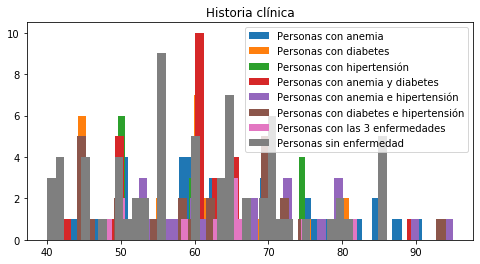

In [4]:
hist_clin(data['Edad'],data['Sexo'],data['Anemia'],data['Diabetes'],data['Hipertensión'])

In [5]:
#Creación Data Frame 'limpio' 

data2 = pd.DataFrame(columns=['Creatinina', 'Plaquetas',
                              'CPK', 'Sodio',
                              'Flujo_Sangre', 'T.obs'])

# Lllenar el Data Frame limpio y acomodarlo

data2['Creatinina'] = sorted(data.T.loc['Creatinina'])
data2['Plaquetas'] = sorted(data.T.loc['Plaquetas'])
data2['CPK'] = sorted(data.T.loc['CPK'])
data2['Sodio'] = sorted(data.T.loc['Sodio'])
data2['Flujo_Sangre'] = sorted(data.T.loc['Flujo_Sangre'])
data2['T.obs'] = data.T.loc['T.obs']

data2.head(5)

,Creatinina,Plaquetas,CPK,Sodio,Flujo_Sangre,T.obs
0,0.5,25100.0,23.0,113.0,14.0,4.0
1,0.6,47000.0,30.0,116.0,15.0,6.0
2,0.6,51000.0,47.0,121.0,15.0,7.0
3,0.6,62000.0,47.0,124.0,17.0,7.0
4,0.6,70000.0,47.0,125.0,17.0,8.0


In [6]:
#Estadísticas de cada uno de los indicadores
tabla = pd.DataFrame({'Media': data2.mean(),
                      'Volatilidad': data2.std()})
tabla

,Media,Volatilidad
Creatinina,1.393880,1.034510
Plaquetas,263358.029264,97804.236869
CPK,581.839465,970.287881
Sodio,136.625418,4.412477
Flujo_Sangre,38.083612,11.834841
T.obs,130.260870,77.614208


# Funciones a utilizar

Para no repetir todo el código en cada uno de los nodos se decidió definir las funciones en principio para eficientar el trabajo.

In [7]:
dist_continua=[d for d in dir(st) if isinstance(getattr(st,d),st.rv_continuous)]
dist_continua

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'rec

In [8]:
#Declaración Distribuciones a Utilizar 
distribuciones = ['alpha','beta','expon','exponnorm','gamma','lognorm','triang','uniform']

Función para encontrar la distribución que más se adapta a nuestros datos, utilizando las previamente definidas.

In [9]:
def distribucion(distribuciones,datos):
    
    e=[]
    [y,x,_]= plt.hist(datos, bins=30, density=True);
    x=x[1:]
    
    def a(dist):
        param = getattr(st, dist).fit(datos)
        pdf = getattr(st, dist).pdf(x, * param)
        plt.plot(x,pdf, label = dist);
        plt.legend();
        e.append([(abs(y-pdf)/pdf).mean()*100,dist])
    [a(dist) for dist in distribuciones]
     
    return e

Prueba Q-Q, resultado el gráfico para observar la similitud de la distribución con el histograma.

In [10]:
# Histograma de las variables creadas
def QQ(datos,dist):
    fig, ax = plt.subplots(3,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)

    y, x, _ = ax[0].hist(datos, bins = 35, density=True)
    x = x[1:]
    plt.grid()
    ax[0].grid()
    #datos
    params = getattr(st, dist).fit(datos)

    # Graficar PDF de la distribución que queremos probar

    y = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x,y,'r--')
    ax[0].set_ylabel('Probability')

    grap2 = st.probplot(datos,dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
    ax[1].set_title('Usando paquete scipy')

    grap1 = sm.qqplot(datos, dist=dist, line='s', fit=True, ax=ax[2])
    ax[2].set_title('Usando paquete stats')

    plt.show()

KDE para obtener la mejor distribución.

In [11]:
# Funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    f = lambda x_grid: kde.pdf(x_grid)
    return f

Gráfica de la distribución y el histograma con la distribución obtenida con el KDE.

In [12]:
def nueva_fun(datos,x):
    fig, ax = plt.subplots(2,1, figsize=(6,8))
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    
    ax[0].plot(x,f(x));
    ax[0].hist(datos,bins = 35, density = True);
    
    ax[1].plot(0,max_f,'x',lw = 10)
    ax[1].plot(x,f(x));
    
    plt.show()

In [13]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 y_ar):
    '''Funcion para hacer el metodo de aceptacion de rechazo '''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = np.random.uniform(0,y_ar,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

Montecarlo utilizando aceptación-rechazo.

In [14]:
def montecarlo(datos,x,N,y_ar):
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    plt.figure()
    plt.plot(x,f(x))
    plt.hist(acep_rechazo(f,max_f,N,y_ar),bins = 70, density = True);
    plt.show()

Intervalo de confianza con el vector de salida de la prueba aceptación-rechazo

In [15]:
# Intervalos de confianza y media de los datos
def int_conf(datos):    
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    X = acep_rechazo(f, max_f, 1000 ,y_ar)
    N = 10**5
    confianza = 0.95
    i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
    i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
    media = np.mean(X)
    #Reportamos en un Data Frame los resultados Obtenidos

    resumen_c = pd.DataFrame(columns = ['Confianza %2.2f' %(confianza) ],
                            index = ['Intervalo t', 'Intervalo Normal', 'Media'])

    resumen_c['Confianza %2.2f' %(confianza)] = [i1, i2, media]
    print('El error entre la media real y Montecarlo es: ', (abs(np.array(datos).mean()
                                                                - media) / media) * 100, '%')
    return resumen_c

Prueba chi chuadrado utilizando el histograma para comprobar la adaptabilidad.

In [16]:
def chi(datos,y_ar):
    np.random.seed(555)
    mu_real = datos.mean(); sigma_real = datos.std()
    N = 100 # Cantidad de muestras
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    n1 = acep_rechazo(f,max_f,N,y_ar)
    J = 90  # Cantidad de particiones del histograma
    [freq, x, _] = plt.hist(n1, J, density=True)
    plt.show()
    # Se obvia el último valor de x para obtener exactamente J muestras de x
    x = x[:-1] 

    # Media y desviación estándar muestral
    mu = np.mean(x)
    sigma = np.std(x)
    print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

    pi = f(x)
    # Cálculo de la esperanza usando la expresión teórica
    Ei = x*pi
    # Cálculo teórico de la chi cuadrada
    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
    print('Valor de chi cuadrado teorico  = ', x2)

    # Cálculo usando la librería estadística de la chi cuadrada
    X2 = st.chisquare(freq, Ei)
    print('Valor de chi cuadrado librería = ', X2)

    # Cálculo de Grados de libertad del estadístico
    p = 2 # Parámetros estimados con los datos
    m = J-p-1 # grados de libertad

    Chi_est = st.chi2.ppf(q=0.95, df=m)
    print('Estadístico de chi_cuadrado = ', Chi_est)
    print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

# CREATININA

Histograma para observar el rango de la x.

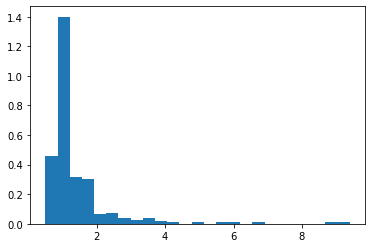

In [17]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Creatinina'], bins = 25, density = True );

In [18]:
datos = data2['Creatinina']
x = np.arange(0,8,.01)
y_ar= 8

C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\luill\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[[186.267412799141, 'alpha'],
 [74291.09723788344, 'beta'],
 [1341.9668559231318, 'expon'],
 [17268.77335763344, 'exponnorm'],
 [85.71496183030457, 'gamma'],
 [911.1338428459584, 'lognorm'],
 [138.18560041350793, 'triang'],
 [143.25529542920845, 'uniform']]

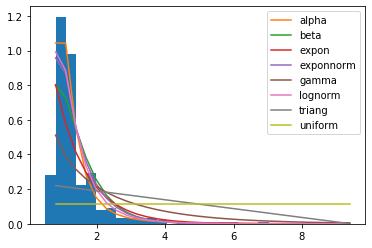

In [19]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **gamma** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

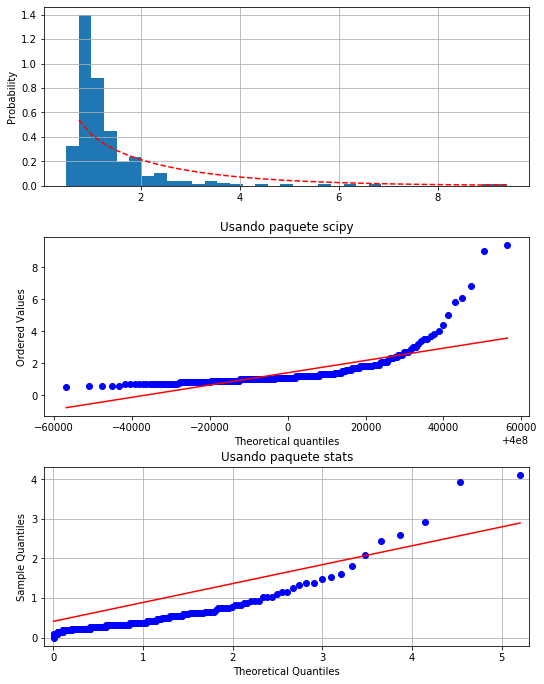

In [20]:
QQ(datos,'gamma')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución gamma no nos sirve para modelar nuestro conjunto de datos

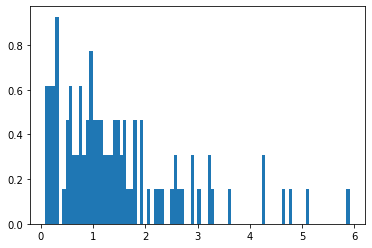

media mu =2.966788, desviación estándar muestral =1.681621


In [21]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.gamma(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [22]:
pi = st.gamma.pdf(x_c, a=0, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  2.9667882558165704 
Desviación estándar muestral =  1.6816206603888193


C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

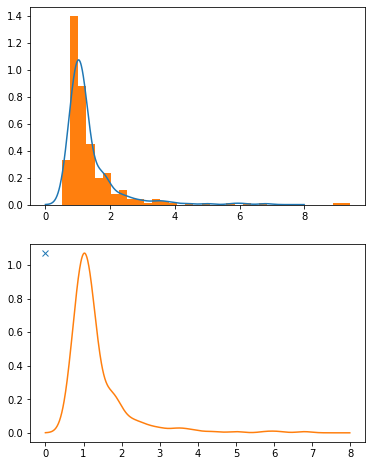

In [23]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

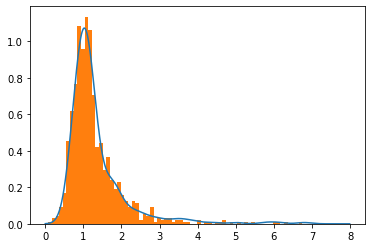

In [24]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

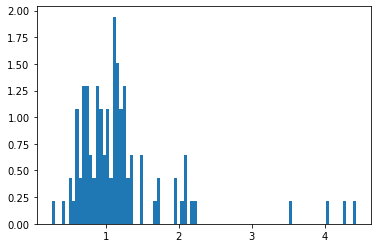

media mu =2.321147, desviación estándar muestral =1.203631
Valor de chi cuadrado teorico  =  32.15992002315984
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=32.15992002315984, pvalue=0.9999999957048532)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  2.321146717814644 
Desviación estándar muestral =  1.2036312441419834


In [25]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $.99$, por lo tanto aceptamos nuestra $H_0$.

In [26]:
int_conf(datos)

El error entre la media real y Montecarlo es:  6.663307590836881 %


,Confianza 0.95
Intervalo t,"(1.260041358106551, 1.3535651953469843)"
Intervalo Normal,"(1.2600980125518573, 1.353508540901678)"
Media,1.3068


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $6.66\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución gamma que era de $85\%$ aprox.

# PLAQUETAS

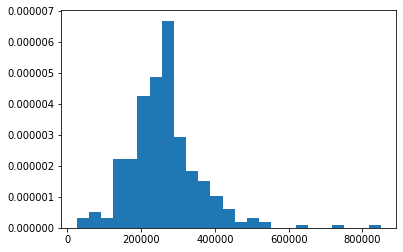

In [27]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Plaquetas'], bins = 25, density = True );

In [28]:
datos = data2['Plaquetas']
x = np.arange(0,8e5,100)
y_ar=8e5

C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in true_divide
  if sys.path[0] == '':
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


[[804.1493522386074, 'alpha'],
 [3553.160379826424, 'beta'],
 [89.93208470714806, 'expon'],
 [362.70630570555727, 'exponnorm'],
 [nan, 'gamma'],
 [1459.4519074628113, 'lognorm'],
 [99.17740081606806, 'triang'],
 [109.92196209587514, 'uniform']]

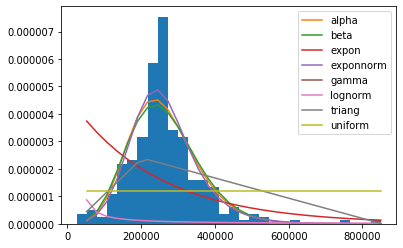

In [29]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **exponencial** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

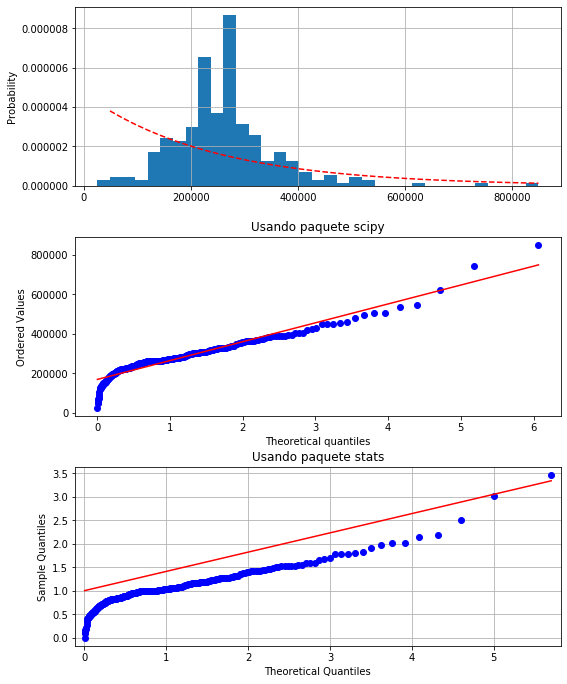

In [30]:
QQ(datos,'expon')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución exponencial no nos sirve para modelar nuestro conjunto de datos

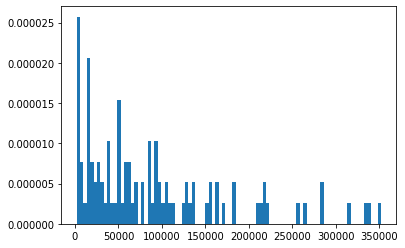

media mu =175002.764846, desviación estándar muestral =101007.980688


In [31]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.exponential(sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [32]:
pi = st.expon.pdf(x_c, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  175002.76484565414 
Desviación estándar muestral =  101007.98068755063


C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\stats.py:5048: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\stats.py:5048: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

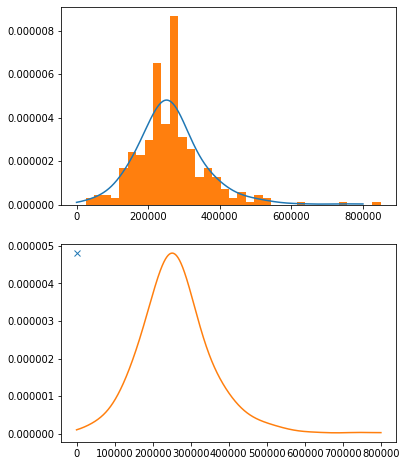

In [33]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

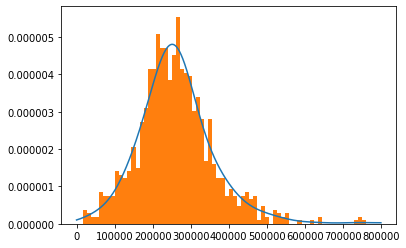

In [34]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

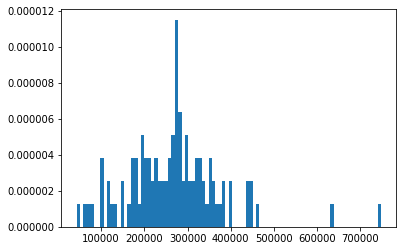

media mu =391655.331075, desviación estándar muestral =203314.215202
Valor de chi cuadrado teorico  =  33.11571206785416
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=33.11571206785416, pvalue=0.9999999900390245)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  391655.331075365 
Desviación estándar muestral =  203314.21520195727


In [35]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $.99$, por lo tanto aceptamos nuestra $H_0$.

In [36]:
int_conf(datos)

El error entre la media real y Montecarlo es:  1.3803551368404454 %


,Confianza 0.95
Intervalo t,"(253603.6193386365, 265940.88000493066)"
Intervalo Normal,"(253611.09294836287, 265933.4063952043)"
Media,259772


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $1.38\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución exponencial que era de $89\%$ aprox.

# CPK

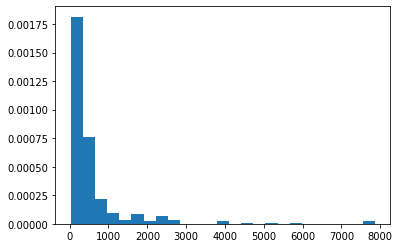

In [37]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['CPK'], bins = 25, density = True );

In [38]:
datos = data2['CPK']
x = np.arange(0,8000,10)
y_ar=8000

[[190.4128535982531, 'alpha'],
 [20588.27089383224, 'beta'],
 [60475.73518744906, 'expon'],
 [83742.77715973345, 'exponnorm'],
 [984.2769847096687, 'gamma'],
 [195.85198846509854, 'lognorm'],
 [186.32616631898313, 'triang'],
 [150.59085841694537, 'uniform']]

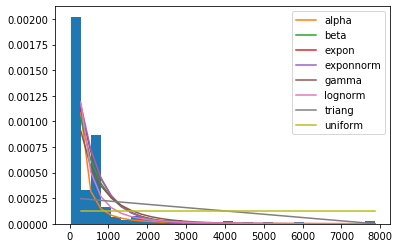

In [39]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **uniforme** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

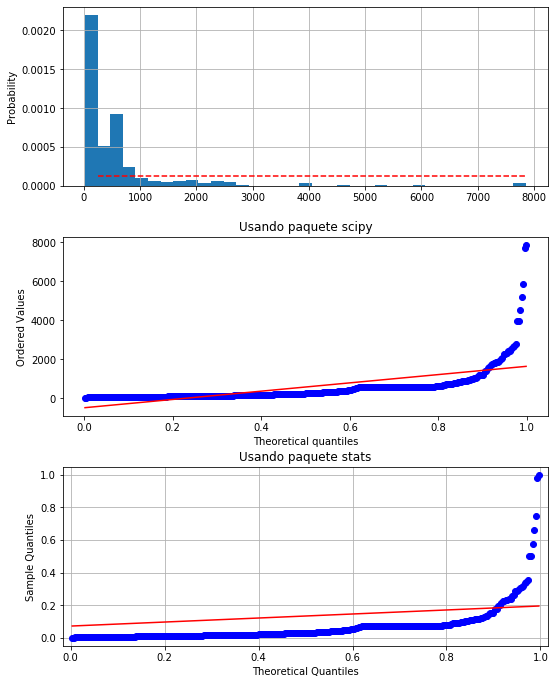

In [40]:
QQ(datos,'uniform')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución uniforme no nos sirve para modelar nuestro conjunto de datos

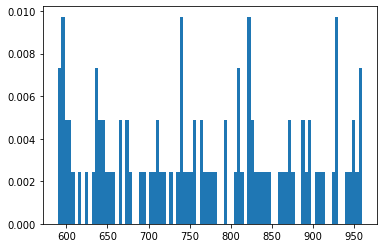

media mu =772.593224, desviación estándar muestral =106.806040


In [41]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.uniform(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [42]:
pi = st.uniform.pdf(x_c, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  772.5932235798564 
Desviación estándar muestral =  106.80604019149816


C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

C:\Users\luill\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


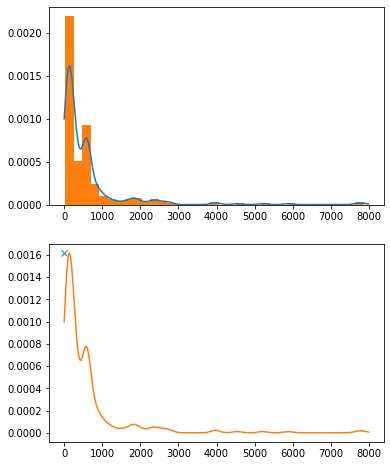

In [43]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

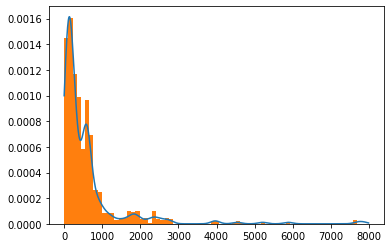

In [44]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

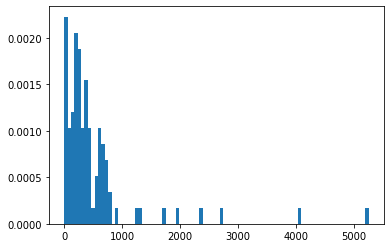

media mu =2596.076011, desviación estándar muestral =1515.520245
Valor de chi cuadrado teorico  =  8.707490433357025
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=8.707490433357025, pvalue=1.0)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  2596.0760111772056 
Desviación estándar muestral =  1515.5202453599222


In [45]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $1$, por lo tanto aceptamos nuestra $H_0$.

In [46]:
int_conf(datos)

El error entre la media real y Montecarlo es:  5.924265164563908 %


,Confianza 0.95
Intervalo t,"(564.7696884541413, 672.190014067955)"
Intervalo Normal,"(564.8347610510516, 672.1249414710446)"
Media,618.48


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $5.92\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución uiforme que era de $150\%$ aprox.

# SODIO

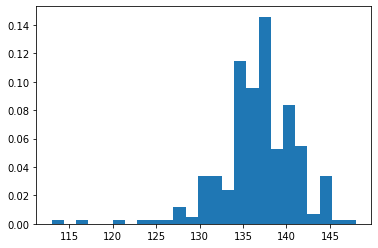

In [57]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Sodio'], bins = 25, density = True );

In [58]:
datos = data2['Sodio']
x = np.arange(100,150,1)
y_ar=150

[[248742.9316908977, 'alpha'],
 [580.9204208621695, 'beta'],
 [188.22943632974278, 'expon'],
 [50232.11617888229, 'exponnorm'],
 [217402.90098918273, 'gamma'],
 [68516.60785515315, 'lognorm'],
 [75.7567025840233, 'triang'],
 [109.23076923076931, 'uniform']]

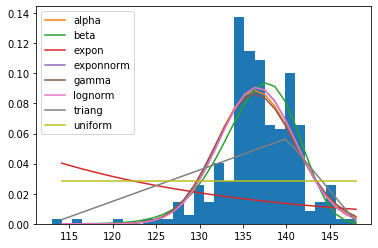

In [59]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **triangular** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

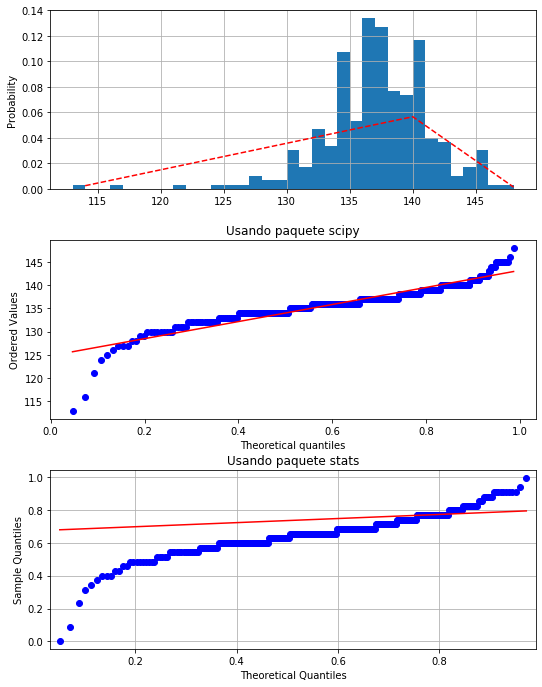

In [60]:
QQ(datos,'triang')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución uniforme no nos sirve para modelar nuestro conjunto de datos

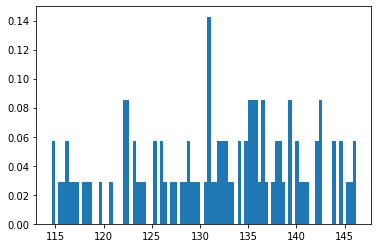

media mu =130.224134, desviación estándar muestral =9.106352


In [61]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.triangular(left=110, mode=mu_real ,right=150, size=N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [62]:
a,b= 110,150
pi = st.triang.pdf(x_c, c= mu,loc=a,scale=(b-a))
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  130.22413379221337 
Desviación estándar muestral =  9.106351835289669


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

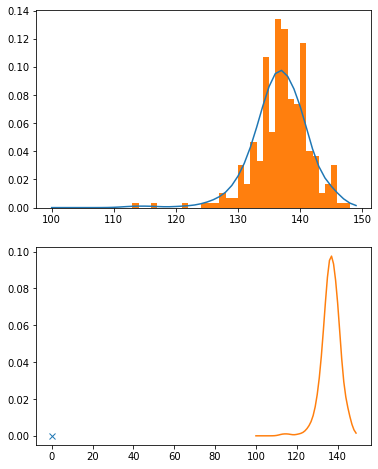

In [63]:
nueva_fun(datos,x)

In [64]:
def acep_rechazo_s(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 y_ar):
    '''Funcion para hacer el metodo de aceptacion de rechazo '''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(100,max_f)
        R1 = np.random.uniform(100,y_ar,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X
def montecarlo_s(datos,x,N,y_ar):
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    plt.figure()
    plt.plot(x,f(x))
    plt.hist(acep_rechazo_s(f,max_f,N,y_ar),bins = 70, density = True);
    plt.show()

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa. En esta parte se modificó la función para cambiar el intervalo, si consideramos desde 0 la simulación nos da un error.

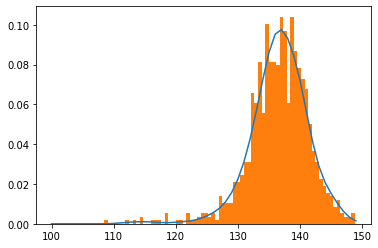

In [65]:
montecarlo_s(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

In [66]:
def chi_s(datos,y_ar):
    np.random.seed(555)
    mu_real = datos.mean(); sigma_real = datos.std()
    N = 100 # Cantidad de muestras
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    n1 = acep_rechazo_s(f,max_f,N,y_ar)
    J = 90  # Cantidad de particiones del histograma
    [freq, x, _] = plt.hist(n1, J, density=True)
    plt.show()
    # Se obvia el último valor de x para obtener exactamente J muestras de x
    x = x[:-1] 

    # Media y desviación estándar muestral
    mu = np.mean(x)
    sigma = np.std(x)
    print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

    pi = f(x)
    # Cálculo de la esperanza usando la expresión teórica
    Ei = x*pi
    # Cálculo teórico de la chi cuadrada
    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
    print('Valor de chi cuadrado teorico  = ', x2)

    # Cálculo usando la librería estadística de la chi cuadrada
    X2 = st.chisquare(freq, Ei)
    print('Valor de chi cuadrado librería = ', X2)

    # Cálculo de Grados de libertad del estadístico
    p = 2 # Parámetros estimados con los datos
    m = J-p-1 # grados de libertad

    Chi_est = st.chi2.ppf(q=0.95, df=m)
    print('Estadístico de chi_cuadrado = ', Chi_est)
    print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

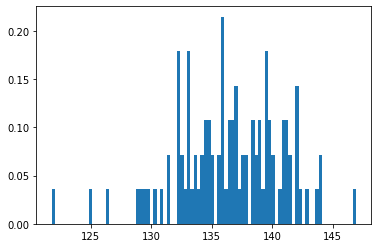

media mu =134.213485, desviación estándar muestral =7.257242
Valor de chi cuadrado teorico  =  472.9009712396043
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=472.9009712396043, pvalue=1.134259052199385e-53)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  134.21348492907714 
Desviación estándar muestral =  7.257241784891904


In [67]:
chi_s(datos,y_ar)

Esta situación está bastante extraña, ya que obtenemos un *p-value* menor a $.05$, por lo tanto la teoría nos dice que debemos rechazar la $H_0$.

In [68]:
# Intervalos de confianza y media de los datos
def int_conf_s(datos):    
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    X = acep_rechazo_s(f, max_f, 1000 ,y_ar)
    N = 10**5
    confianza = 0.95
    i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
    i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
    media = np.mean(X)
    #Reportamos en un Data Frame los resultados Obtenidos

    resumen_c = pd.DataFrame(columns = ['Confianza %2.2f' %(confianza) ],
                            index = ['Intervalo t', 'Intervalo Normal', 'Media'])

    resumen_c['Confianza %2.2f' %(confianza)] = [i1, i2, media]
    print('El error entre la media real y Montecarlo es: ', (abs(np.array(datos).mean()
                                                                - media) / media) * 100, '%')
    return resumen_c
int_conf_s(datos)

El error entre la media real y Montecarlo es:  0.10538270427839737 %


,Confianza 0.95
Intervalo t,"(136.1731145937684, 136.79006554571765)"
Intervalo Normal,"(136.17348832751364, 136.7896918119724)"
Media,136.482


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $.10\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución triangular que era de $75\%$ aprox.

# FLUJO DE SANGRE

In [ ]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Flujo_Sangre'], bins = 15, density = True );

In [ ]:
datos = data2['Flujo_Sangre']
x = np.arange(0,80,1)
y_ar=80

In [ ]:
y_real, x_real,  _ = plt.hist(datos,
                              bins = 25, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

distribucion(distribuciones,datos)
plt.legend()
plt.show()

In [ ]:
QQ(datos,'exponnorm')

In [ ]:
nueva_fun(datos,x)

In [ ]:
montecarlo(datos,x,1000,y_ar)

In [ ]:
chi(datos,y_ar)

In [ ]:
int_conf(datos)

# TIEMPO DE OBSERVACIÓN

In [ ]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['T.obs'], bins = 25, density = True );

In [ ]:
datos = data2['T.obs']
x = np.arange(0,300,1)
y_ar=300

In [ ]:
y_real, x_real,  _ = plt.hist(datos,
                              bins = 25, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

distribucion(distribuciones,datos)
plt.legend()
plt.show()

In [ ]:
QQ(datos,'beta')

In [ ]:
nueva_fun(datos,x)

In [ ]:
montecarlo(datos,x,1000)

In [ ]:
chi(datos,y_ar)

In [ ]:
int_conf(datos)